In [1]:
import dataset
import matplotlib.pyplot as plt
import tree_search
import numpy as np
import sympy
sympy.init_printing()

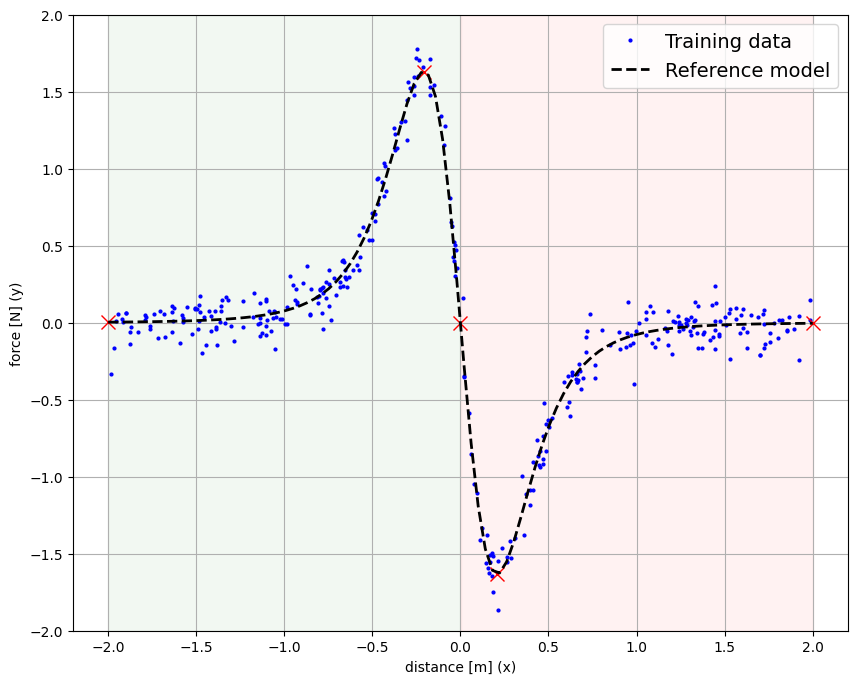

In [2]:
S = dataset.MagmanDatasetScaled()
S.sample(size=500, noise=0.05, mesh=False)
#S.load('data/magman.csv')
#S.erase(-0.3, 0.3)
S.split()  # train_size=0.7 by default
S.plot()

In [17]:
stree, data_tuning_report, knowledge_image_tuning_report, knowledge_deriv_tuning_report = \
    tree_search.infer_syntaxtree(S, max_degree=6, max_degree_inner=1, max_depth=5, trials=150, pk_pressure=.0)

if data_tuning_report is not None:
    print(f"\nData Root found:    {data_tuning_report['root_found']}")
    print(f"Data MSE:             {data_tuning_report['mse']}")
    print(f"Data R2:              {1 - (data_tuning_report['sse'] / S.data_sst)}")

if knowledge_image_tuning_report is not None:
    print(f"\nKnowledge (image) Root found: {knowledge_image_tuning_report['root_found']}")
    print(f"Knowledge (image) MSE:        {knowledge_image_tuning_report['mse']}")

if knowledge_deriv_tuning_report is not None:
    print(f"\nKnowledge (deriv) Root found: {knowledge_deriv_tuning_report['root_found']}")
    print(f"Knowledge (deriv) MSE:        {knowledge_deriv_tuning_report['mse']}")

if stree is not None:
    print(f"\nModel: " + stree.tostring())

[0, 100], [100, 140], [140, 180], [180, 240]
========== Syntax Tree Inference ==========
TREE FOUND P(sin(P(x)))
TREE FOUND P(sin(P(x)))

Data tuning (avg time):      0 ms
Knowledge tuning (avg time):   0 ms
Data tuning (total time):      531 ms
Knowledge tuning (total time): 0 ms

Get system (avg time): 0 ms
Get system (total time): 495 ms
Get system (total calls): 8493

Setcoeffs (total time): 0 ms

Data Root found:    False
Data MSE:             0.016344733167767807
Data R2:              0.9596525973803538

Model: P_a(x)/P_b(x)


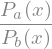

In [18]:
sympy.parse_expr(stree.tostring(), evaluate=False)

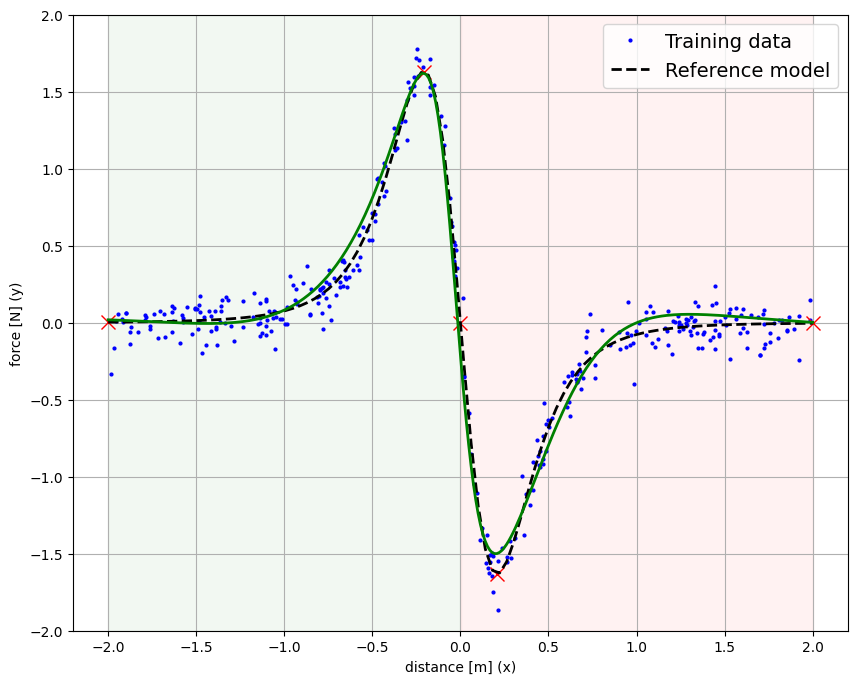

In [19]:
S.plot()

x = np.linspace(S.xl, S.xu, 300)

if data_tuning_report is not None:
    stree.set_coeffs(data_tuning_report['sol'].tolist())
    plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='green', label='Data model');

if knowledge_image_tuning_report is not None:
    stree.set_coeffs(knowledge_image_tuning_report['sol'].tolist())
    plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='red',   label='Knowledge (image) model');

if knowledge_deriv_tuning_report is not None:
    stree.set_coeffs(knowledge_deriv_tuning_report['sol'].tolist())
    plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='orange',   label='Knowledge (deriv) model');

========== Syntax Tree Enhancement ==========
[0, 500], [500, 700], [700, 900], [900, 1200]
[Restart #1] MSE improvement from None to 0.246335990414156
[Restart #2] No improvement.
[Restart #3] No improvement.
[Restart #4] MSE improvement from 0.246335990414156 to 0.2360304538534992
[Restart #5] MSE improvement from 0.2360304538534992 to 0.14890254884719392
[Restart #6] No improvement.
[Restart #7] No improvement.
[Restart #8] No improvement.
[Restart #9] No improvement.
[Restart #10] No improvement.
Training MSE: 0.14890254884719392


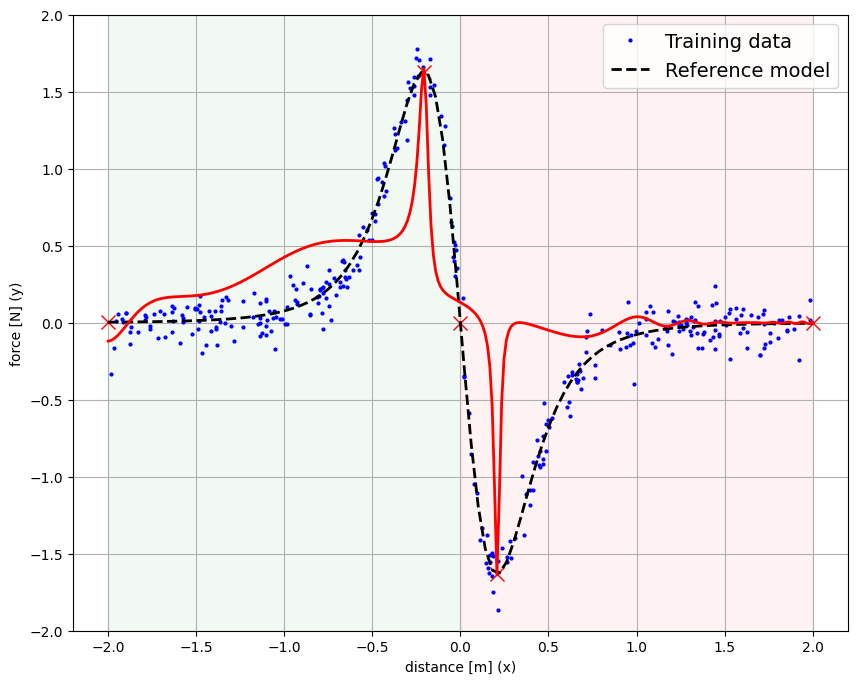

In [6]:
#
# model enhancement
#

sample_size = 100
n_restarts  = 10

best_tuning_report = tree_search.enhance_syntax_tree(stree, S, sample_size, n_restarts)

S.plot()
x = np.linspace(S.xl, S.xu, 300)
stree.set_coeffs(best_tuning_report['sol'].tolist())
plt.plot(x, stree.evaluate(x), linestyle='solid', linewidth=2, color='red', label='Final model');

In [7]:
#
# model testing
#

test_mse, test_r2, pk_sat_ration, pk_sat_count, pk_sat_size = tree_search.test_syntax_tree(stree, S, sample_size=1000)
print(f"Test MSE:       {test_mse}")
print(f"Test R2:        {test_r2}")
print(f"PK sat ratio:   {pk_sat_ration}")
print(f"PK sat count:   {pk_sat_count}")
print(f"PK sat size:    {pk_sat_size}")

========== Syntax Tree Testing ==========
Test MSE:       0.28292785313283947
Test R2:        0.368115612180999
PK sat ratio:   0.8198522069103256
PK sat count:   4105
PK sat size:    5007
